In [1]:
#Sentiment Analysis tool to classify text
#Python, nltk and Scikit-learn for model building and training


In [2]:
#import necessary libraries
import pandas as pd
import numpy as np
import nltk
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
import warnings
warnings.filterwarnings('ignore')

In [3]:
#load dataset from kaggle from this link https://www.kaggle.com/datasets/yasserh/imdb-movie-ratings-sentiment-analysis

!pip install kaggle
from google.colab import files

# Authenticate Kaggle API
!kaggle datasets download -d yasserh/imdb-movie-ratings-sentiment-analysis
!unzip imdb-movie-ratings-sentiment-analysis.zip

Dataset URL: https://www.kaggle.com/datasets/yasserh/imdb-movie-ratings-sentiment-analysis
License(s): CC0-1.0
 83% 17.0M/20.6M [00:00<00:00, 39.6MB/s]
100% 20.6M/20.6M [00:00<00:00, 40.9MB/s]
Archive:  imdb-movie-ratings-sentiment-analysis.zip
  inflating: movie.csv               


In [6]:
#load the dataset
data = pd.read_csv("movie.csv")
print(data.info())
print(data.describe())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    40000 non-null  object
 1   label   40000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 625.1+ KB
None
              label
count  40000.000000
mean       0.499525
std        0.500006
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000


,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [7]:
data.text[0]

'I grew up (b. 1965) watching and loving the Thunderbirds. All my mates at school watched. We played "Thunderbirds" before school, during lunch and after school. We all wanted to be Virgil or Scott. No one wanted to be Alan. Counting down from 5 became an art form. I took my children to see the movie hoping they would get a glimpse of what I loved as a child. How bitterly disappointing. The only high point was the snappy theme tune. Not that it could compare with the original score of the Thunderbirds. Thankfully early Saturday mornings one television channel still plays reruns of the series Gerry Anderson and his wife created. Jonatha Frakes should hand in his directors chair, his version was completely hopeless. A waste of film. Utter rubbish. A CGI remake may be acceptable but replacing marionettes with Homo sapiens subsp. sapiens was a huge error of judgment.'

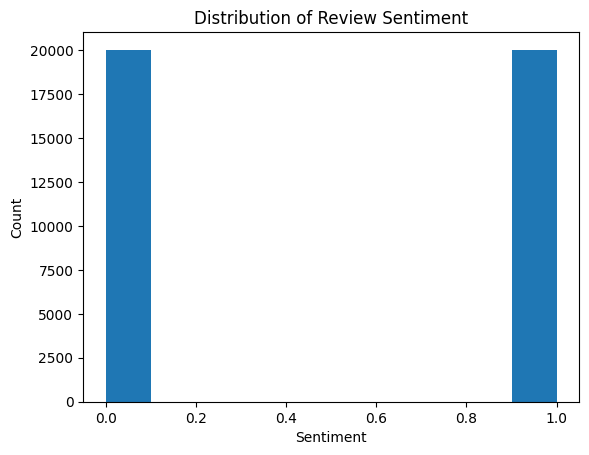

In [10]:
# @title Distribution of Review Sentiment

import matplotlib.pyplot as plt

plt.hist(data['label'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
_ = plt.title('Distribution of Review Sentiment')

In [11]:
df_positive= data[data['label']==1]
df_negative= data[data['label']==0]

In [12]:
df1  = df_positive.sample(1000)
df2 = df_negative.sample(1000)
data1 = pd.concat([df1, df2])

In [13]:
data1.reset_index(drop=True, inplace=True)
data1.head()

,text,label
0,> This show is the single greatest thing to co...,1
1,I finally purchased and added to my collection...,1
2,Due to the fact that in 1976 there were no CGI...,1
3,"I like movies that show real people ""Americans...",1
4,"Gordon Parks, the prolific black Life magazine...",1


In [14]:
text = data1.text[4]

In [15]:
#cleaning using regex
def clean_text(text):
  text = re.sub(r'<br\s*/?>', ' ',text)
  text = re.sub(r'\s+' , ' ', text)
  text = re.sub(r'[^a-zA-Z0-9]', ' ', text)
  text = text.strip()
  return text

In [16]:
clean_text(text)

'Gordon Parks  the prolific black Life magazine photographer  made a true ticking timebomb of a movie here   one that does not mess around  Based upon the true story of two NYC cops   later dubbed Batman and Robin   who singlehandedly employed radical tactics to clean up their precinct neighborhood of drugs  this is a cop buddy movie before that term became a repetitive formula  Lightning paced  there is not one unimportant throwaway scene here  Man  early  70s NYC must have been a terrible place to be a police officer  from the looks of movies like this and  Serpico   These two cops start out as safety division rookies  busting dealers in plainclothes in their spare time  But instead of receiving applause from the city police department  they receive nothing but resistance and antagonism from their peers  They have to singlehandedly navigate a minefield of police and legal corruption  boneheaded assignments meant to keep them from their work on the streets  ruthless drug kingpins  and

In [17]:
#apply the function on my column
data1['text'] = data1['text'].apply(clean_text)

In [18]:
#find the maximum length of the text in data1.text
max_len = max([len(t.split()) for t in data1.text])
print(max_len)

1350


In [19]:
#Tokenization and stopwords removal using nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [20]:
#a function to remove stopwrds and tokninizing and join back to string
def tokenize_text(text):
  tokens = word_tokenize(text)
  tokens = [token.lower() for token in tokens if token.lower() not in stop_words]
  tokens = ' '.join(tokens)
  return tokens

In [21]:
#tokenize and remove stopwords data1.text and create a new column for the tokens
data1['tokens'] = data1['text'].apply(tokenize_text)

In [ ]:
data1.head()

,text,label,tokens
0,Sex drugs racism and of course you ABC s Wh...,1,sex drugs racism course abc could want kid sho...
1,Without being one of my favorites this is goo...,1,without one favorites good change pace even mi...
2,Latter Days for me was a very moving film it ...,1,latter days moving film showed hard disrespect...
3,I agree that this film achieved its goals perf...,1,agree film achieved goals perfectly saw showti...
4,The great talents of Michael Powell and Emeric...,1,great talents michael powell emeric pressberge...


In [22]:
#find the maximum length of each row in data1.tokens
max_len = max([len(t) for t in data1.tokens])
print(max_len)

4402


In [23]:
data1.tokens.shape

(2000,)

In [24]:
#train test split my data1
x = data1.tokens
y = data1.label
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [25]:
#define my models
decision_trees = DecisionTreeClassifier()
svm = SVC()
random_forest = RandomForestClassifier()
multinomial = MultinomialNB()


In [26]:
#initialize my vectorizer
vectorizer = TfidfVectorizer(max_features=1000, ngram_range=(1,2))

In [27]:
#build a pipeline for each model and vectorizer
decision_trees_pipeline = Pipeline([('vectorizer', vectorizer), ('decision_trees', decision_trees)])
svm_pipeline = Pipeline([('vectorizer', vectorizer), ('svm', svm)])
random_forest_pipeline = Pipeline([('vectorizer', vectorizer), ('random_forest', random_forest)])
multinomial_pipeline = Pipeline([('vectorizer', vectorizer), ('multinomial', multinomial)])


In [28]:
#train each individual pipeline
decision_trees_pipeline.fit(X_train, y_train)
svm_pipeline.fit(X_train, y_train)
random_forest_pipeline.fit(X_train, y_train)
multinomial_pipeline.fit(X_train, y_train)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_features=1000, ngram_range=(1, 2))),
                ('multinomial', MultinomialNB())])

In [29]:
#predict for each pipeline
decision_trees_pred = decision_trees_pipeline.predict(X_test)
svm_pred = svm_pipeline.predict(X_test)
random_forest_pred = random_forest_pipeline.predict(X_test)
multinomial_pred = multinomial_pipeline.predict(X_test)

#print the accuracy score for each model
print("Decision Trees Accuracy:", accuracy_score(y_test, decision_trees_pred))
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))
print("Random Forest Accuracy:", accuracy_score(y_test, random_forest_pred))
print("Multinomial Accuracy:", accuracy_score(y_test, multinomial_pred))

Decision Trees Accuracy: 0.674
SVM Accuracy: 0.836
Random Forest Accuracy: 0.798
Multinomial Accuracy: 0.808


In [30]:
#print a classificaton report for each model
print("Decision Trees Classification Report:")
print(classification_report(y_test, decision_trees_pred))
print("SVM Classification Report:")
print(classification_report(y_test, svm_pred))
print("Random Forest Classification Report:")
print(classification_report(y_test, random_forest_pred))
print("Multinomial Classification Report:")
print(classification_report(y_test, multinomial_pred))



Decision Trees Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.71      0.68       243
           1       0.70      0.64      0.67       257

    accuracy                           0.67       500
   macro avg       0.68      0.67      0.67       500
weighted avg       0.68      0.67      0.67       500

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.81      0.83       243
           1       0.83      0.86      0.84       257

    accuracy                           0.84       500
   macro avg       0.84      0.84      0.84       500
weighted avg       0.84      0.84      0.84       500

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.80      0.79       243
           1       0.81      0.79      0.80       257

    accuracy                           0.80       500
   macro avg       0.80   

In [31]:
#confusion matrix for each model
cf_matrix_decision_trees = confusion_matrix(y_test, decision_trees_pred)
print("Decision Trees Confusion Matrix:")
print(cf_matrix_decision_trees)

cf_matrix_svm = confusion_matrix(y_test, svm_pred)
print("SVM Confusion Matrix:")
print(cf_matrix_svm)

cf_matrix_random_forest = confusion_matrix(y_test, random_forest_pred)
print("Random Forest Confusion Matrix:")
print(cf_matrix_random_forest)

cf_matrix_multinomial = confusion_matrix(y_test, multinomial_pred)
print("Multinomial Confusion Matrix:")
print(cf_matrix_multinomial)

Decision Trees Confusion Matrix:
[[172  71]
 [ 92 165]]
SVM Confusion Matrix:
[[198  45]
 [ 37 220]]
Random Forest Confusion Matrix:
[[195  48]
 [ 53 204]]
Multinomial Confusion Matrix:
[[190  53]
 [ 43 214]]


Text(95.72222222222221, 0.5, 'Actual')

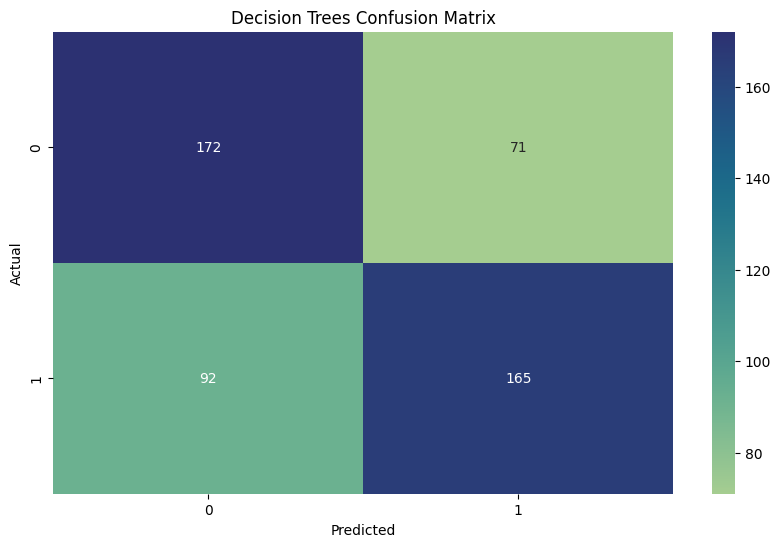

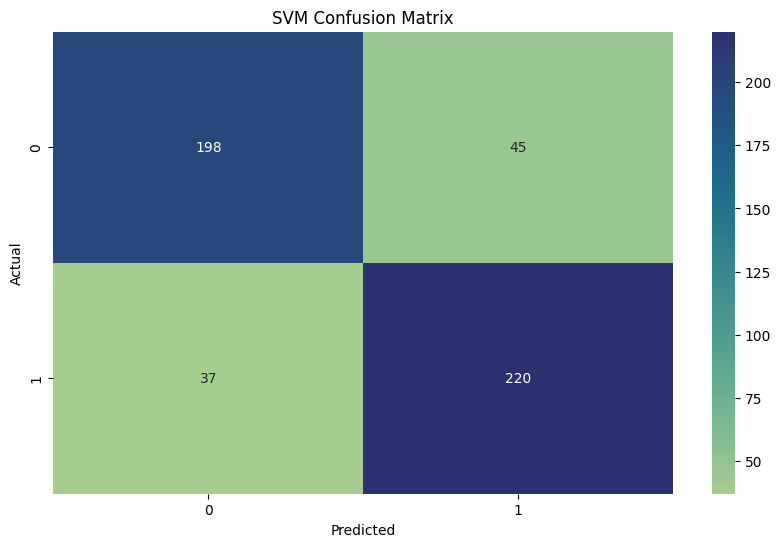

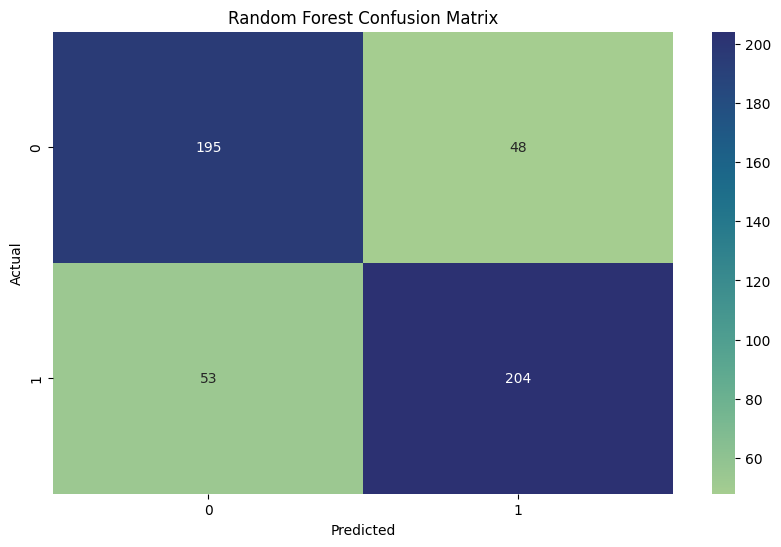

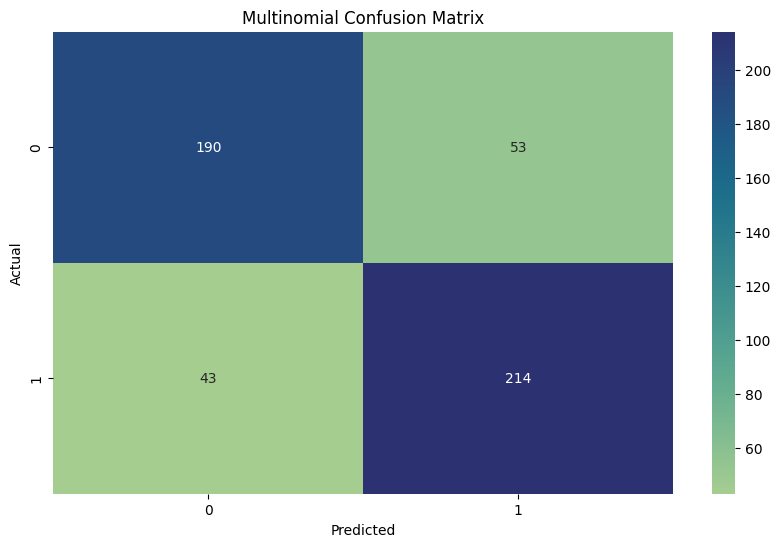

In [32]:
#plot each confusion matrix using seaborn heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(cf_matrix_decision_trees, annot=True, fmt="d", cmap="crest")
plt.title("Decision Trees Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show

plt.figure(figsize=(10, 6))
sns.heatmap(cf_matrix_svm, annot=True, fmt="d", cmap="crest")
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show

plt.figure(figsize=(10, 6))
sns.heatmap(cf_matrix_random_forest, annot=True, fmt="d", cmap="crest")
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show

plt.figure(figsize=(10, 6))
sns.heatmap(cf_matrix_multinomial, annot=True, fmt="d", cmap="crest")
plt.title("Multinomial Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [33]:
#save svm and multinomial pipelines
import joblib
joblib.dump(svm_pipeline, 'svm_pipeline.pkl')
joblib.dump(multinomial_pipeline, 'multinomial_pipeline.pkl')

['multinomial_pipeline.pkl']